<a href="https://colab.research.google.com/github/antonioz2022/Projetos5/blob/main/projetos5_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🗂️ Imports/Upload


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files
import seaborn as sns

sns.set_theme(style="whitegrid")

In [3]:
nome_arquivo = '/content/dataset2.csv'

# Lê o CSV
df = pd.read_csv(nome_arquivo)

/tmp/ipython-input-1436564207.py:4: DtypeWarning: Columns (6,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(nome_arquivo)


#📊 DATASET

In [4]:
df.head()

,sexo,faixa_etaria,renda,mobilidade_reduzida,detalhe_mobilidade,internet_celular,cep_residencia,cidade_residencia,bairro_residencia,logradouro_residencia,...,horario_fim_aula,horario_inicio_aula,origem_ida_aula,outros_aula,freq_aula,transporte_aula,utiliza_app_taxi_aula,utiliza_integracao_aula,terminal_aula,zona_residencia
0,1,5,5,2,0,1,50720595,RECIFE,MADALENA,RUA ARLINDO GOUVEIA,...,0:00:00,0:00:00,0,0,0,0,0,0,0,102
1,2,4,2,2,0,1,51011080,RECIFE,PINA,AVENIDA ENCANTA MOCA,...,0:00:00,0:00:00,0,0,0,0,0,0,0,65
2,2,4,2,2,0,1,53433030,PAULISTA,PAU AMARELO,RUA LUXEMBURGO,...,0:00:00,0:00:00,0,0,0,0,0,0,0,0
3,2,4,2,2,0,1,50050030,RECIFE,BOA VISTA,RUA SETE DE SETEMBRO,...,0:00:00,0:00:00,0,0,0,0,0,0,0,58
4,2,4,3,2,0,1,53419150,PAULISTA,JAGUARANA,RUA CANTOR VANDO,...,0:00:00,0:00:00,0,0,0,0,0,0,0,0


In [5]:
print("Linhas x colunas:", df.shape)
print("\nColunas:")
print(df.columns.tolist())


Linhas x colunas: (58644, 51)

Colunas:
['sexo', 'faixa_etaria', 'renda', 'mobilidade_reduzida', 'detalhe_mobilidade', 'internet_celular', 'cep_residencia', 'cidade_residencia', 'bairro_residencia', 'logradouro_residencia', 'possui_filho_escola', 'quant_filhos', 'meios_transporte_filhos', 'utiliza_app_taxi_escola', 'resp_pesquisa_matricula', 'escola_filho', 'outras_escolas', 'profissao', 'trabalha', 'cep_trabalho', 'cidade_trabalho', 'bairro_trabalho', 'logradouro_trabalho', 'turno_trabalho', 'horario_fim_trabalho', 'horario_inicio_trabalho', 'local_saida_trab', 'origem_trabalho', 'freq_local_trabalho', 'meio_transporte_trab', 'utiliza_app_taxi_trabalho', 'utiliza_terminal_int_trabalho', 'terminal_int_trabalho', 'pesquisado_estuda', 'cep_escola', 'cidade_escola', 'bairro_escola', 'logradouro_escola', 'turno_aula', 'nivel_estudo', 'nome_instituicao_ensino', 'horario_fim_aula', 'horario_inicio_aula', 'origem_ida_aula', 'outros_aula', 'freq_aula', 'transporte_aula', 'utiliza_app_taxi_aula

In [6]:
# Cria flags de trabalho e estudo
df["trabalha_flag"] = df["trabalha"] == 1
df["estuda_flag"]   = df["pesquisado_estuda"] == 1

# Função para classificar monomodal/multimodal
def classifica_modo(valor):
    if pd.isna(valor):
        return "sem_resposta"
    valor = str(valor).strip()
    if valor == "0" or valor == "":
        return "sem_resposta"
    if "," in valor:
        return "multimodal"
    return "monomodal"

# Aplicar para os três contextos
df["tipo_trajeto_trabalho"] = df["meio_transporte_trab"].map(classifica_modo)
df["tipo_trajeto_aula"]     = df["transporte_aula"].map(classifica_modo)
df["tipo_trajeto_filhos"]   = df["meios_transporte_filhos"].map(classifica_modo)

# Uso de terminais e integração
df["usa_terminal_trabalho"] = df["terminal_int_trabalho"].astype(str).str.strip() != "0"
df["usa_integracao_aula"]   = df["utiliza_integracao_aula"] == 1

# 🚇 Estatísticas sobre quem usa multimodal vs monomodal.


###############################################
#        RESUMO GERAL       #
###############################################

📊 Panorama geral da população analisada:

• Aproximadamente 71.0% das pessoas entrevistadas trabalham.
• Cerca de 40.5% estudam (escola, curso técnico ou universidade).
• Apenas 15.2% utilizam algum Terminal de Integração no trajeto até o trabalho.
• Somente 4.9% usam integração formal para ir à escola/faculdade.

Esses números mostram que, embora muitas pessoas se desloquem diariamente,
o uso da integração formal ainda é relativamente baixo.

###############################################
#   COMO AS PESSOAS SE DESLOCAM (RESUMO)     #
###############################################

🚶‍♂️ Para ir ao trabalho:
   → monomodal: 54.9%
   → sem_resposta: 29.2%
   → multimodal: 15.9%

🎓 Para ir à escola/faculdade:
   → sem_resposta: 59.4%
   → monomodal: 30.4%
   → multimodal: 10.1%

👨‍👧 Para levar filhos à escola:
   → sem_resposta: 75.8%
   → monomodal: 20.0%
   

/tmp/ipython-input-1815432060.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{v*100:.0f}%" for v in vals])


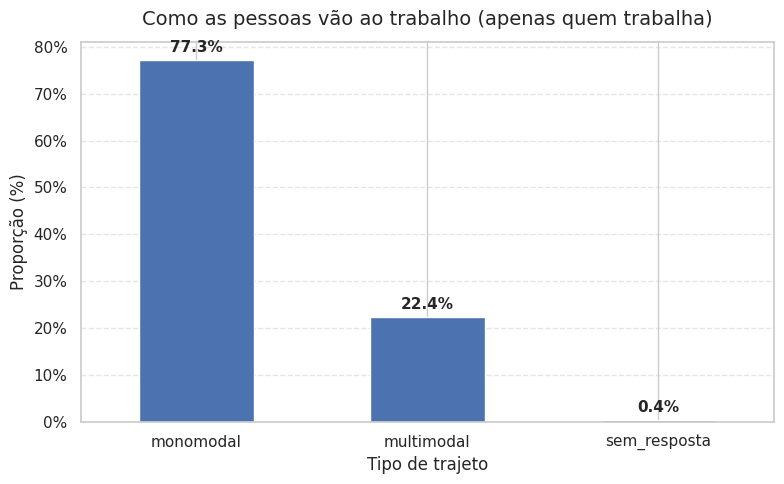

/tmp/ipython-input-1815432060.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{v*100:.0f}%" for v in vals])


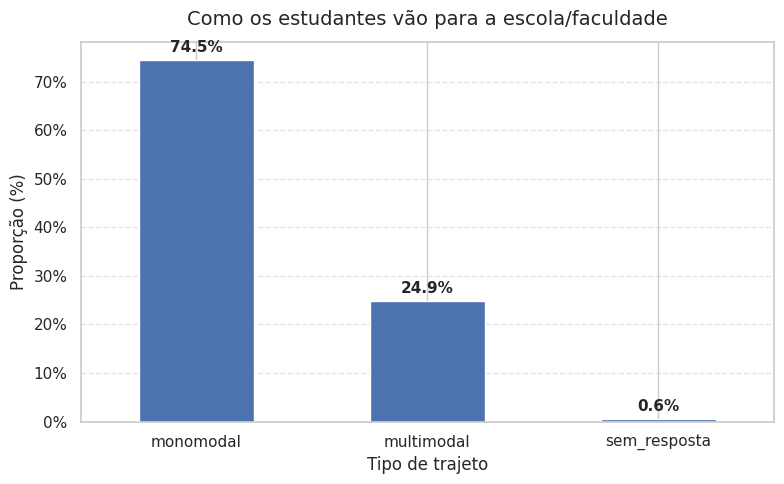

/tmp/ipython-input-1815432060.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{v*100:.0f}%" for v in vals])


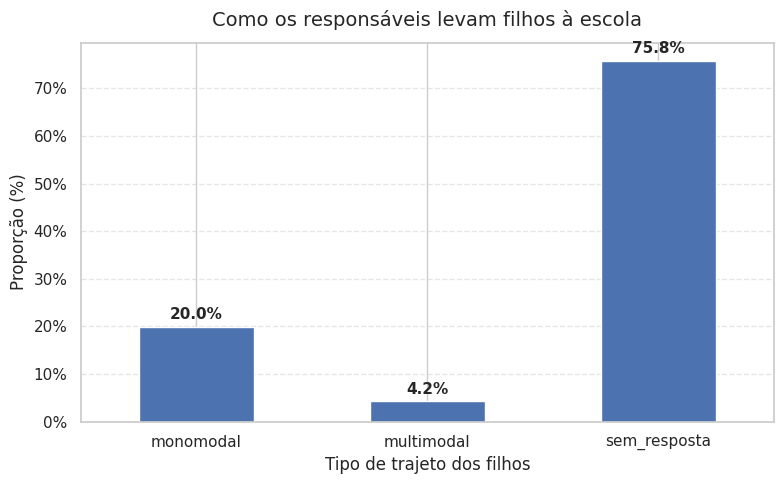

In [7]:
# =====================================================
# APRESENTAÇÃO DOS RESULTADOS
# =====================================================

import matplotlib.pyplot as plt

print("\n###############################################")
print("#        RESUMO GERAL       #")
print("###############################################\n")

# ---------- indicadores gerais ----------
pct_trabalham = df["trabalha_flag"].mean()
pct_estudam   = df["estuda_flag"].mean()
pct_terminal  = df["usa_terminal_trabalho"].mean()
pct_integracao_aula = df["usa_integracao_aula"].mean()

print("📊 Panorama geral da população analisada:\n")
print(f"• Aproximadamente {pct_trabalham:.1%} das pessoas entrevistadas trabalham.")
print(f"• Cerca de {pct_estudam:.1%} estudam (escola, curso técnico ou universidade).")
print(f"• Apenas {pct_terminal:.1%} utilizam algum Terminal de Integração no trajeto até o trabalho.")
print(f"• Somente {pct_integracao_aula:.1%} usam integração formal para ir à escola/faculdade.\n")

print("Esses números mostram que, embora muitas pessoas se desloquem diariamente,")
print("o uso da integração formal ainda é relativamente baixo.\n")


# ---------- distribuições globais de tipo de trajeto ----------
dist_trab   = df["tipo_trajeto_trabalho"].value_counts(normalize=True)
dist_aula   = df["tipo_trajeto_aula"].value_counts(normalize=True)
dist_filhos = df["tipo_trajeto_filhos"].value_counts(normalize=True)

print("###############################################")
print("#   COMO AS PESSOAS SE DESLOCAM (RESUMO)     #")
print("###############################################\n")

print("🚶‍♂️ Para ir ao trabalho:")
for k, v in (dist_trab * 100).round(1).items():
    print(f"   → {k}: {v}%")
print()

print("🎓 Para ir à escola/faculdade:")
for k, v in (dist_aula * 100).round(1).items():
    print(f"   → {k}: {v}%")
print()

print("👨‍👧 Para levar filhos à escola:")
for k, v in (dist_filhos * 100).round(1).items():
    print(f"   → {k}: {v}%")
print()

print("Esses resultados mostram quantas pessoas usam um único modo de transporte")
print("ou combinam vários no seu trajeto.\n")


# =====================================================
# VISUALIZAÇÕES MAIS BONITAS
# =====================================================

workers  = df[df["trabalha_flag"]]
students = df[df["estuda_flag"]]

def plot_bar_percent(series, title, xlabel="Tipo de trajeto"):
    """
    Plota um gráfico de barras com porcentagens e rótulos em cima das barras,
    em um layout mais agradável para apresentação.
    """
    categorias_ordem = ["monomodal", "multimodal", "sem_resposta"]
    series = series.reindex(categorias_ordem).dropna()

    plt.figure(figsize=(8, 5))
    ax = series.plot(kind="bar")

    ax.set_title(title, fontsize=14, pad=12)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel("Proporção (%)", fontsize=12)

    # grade leve no fundo para facilitar leitura
    ax.grid(axis="y", linestyle="--", alpha=0.5)

    # deixar os rótulos do eixo X mais legíveis
    plt.xticks(rotation=0, fontsize=11)
    plt.yticks(fontsize=11)

    # converter eixo Y em porcentagem
    vals = ax.get_yticks()
    ax.set_yticklabels([f"{v*100:.0f}%" for v in vals])

    # adicionar porcentagem em cima das barras
    for i, v in enumerate(series):
        ax.text(
            i,
            v + 0.01,
            f"{v*100:.1f}%",
            ha="center",
            va="bottom",
            fontsize=11,
            fontweight="bold"
        )

    plt.tight_layout()
    plt.show()


# ---------- gráfico 1: tipo de trajeto ao trabalho ----------
dist_trab_workers = workers["tipo_trajeto_trabalho"].value_counts(normalize=True)
plot_bar_percent(
    dist_trab_workers,
    title="Como as pessoas vão ao trabalho (apenas quem trabalha)"
)

# ---------- gráfico 2: tipo de trajeto à aula ----------
dist_aula_students = students["tipo_trajeto_aula"].value_counts(normalize=True)
plot_bar_percent(
    dist_aula_students,
    title="Como os estudantes vão para a escola/faculdade"
)

# ---------- gráfico 3: tipo de trajeto dos filhos ----------
dist_filhos_all = df["tipo_trajeto_filhos"].value_counts(normalize=True)
plot_bar_percent(
    dist_filhos_all,
    title="Como os responsáveis levam filhos à escola",
    xlabel="Tipo de trajeto dos filhos"
)


###📊 Por que utilizamos gráficos de barras?

Optamos por utilizar gráficos de barras porque eles são uma das formas mais claras e intuitivas de comparar categorias distintas dentro de um conjunto de dados.
No nosso caso, o objetivo era visualizar como as pessoas se deslocam — se usam apenas um modo de transporte, combinam vários ou não responderam.

Os gráficos de barras são ideais aqui porque:

Mostram diferenças de forma rápida: basta olhar a altura das barras para entender qual tipo de trajeto é mais comum.

Facilitam a comparação direta entre categorias (ex.: monomodal vs multimodal).

Funcionam muito bem com proporções expressas em porcentagem.

Evitam ambiguidade — diferente de gráficos de pizza, onde pequenas diferenças podem ser difíceis de perceber.

Permitem inserir rótulos claros em cima das barras, ajudando o leitor a entender os valores sem precisar analisar eixos.

Em análises populacionais e de comportamento de deslocamento, como esta, gráficos de barras oferecem simplicidade, precisão e boa legibilidade, tornando-os a melhor escolha para comunicar resultados de maneira acessível para qualquer público.

# 🚴‍♂️ Qual o perfil dos usuários de integração entre modais?

In [ ]:
print("--- ⚙️ PASSO 2: PROCESSAMENTO DE DADOS ---")

# 1. Funções de Limpeza
def classifica_modo(valor):
    if pd.isna(valor): return "sem_resposta"
    valor = str(valor).strip()
    if valor == "0" or valor == "": return "sem_resposta"
    if "," in valor: return "multimodal"
    return "monomodal"

# 2. Tratamento de Texto e Terminais
df['terminal_int_trabalho'] = df['terminal_int_trabalho'].astype(str).str.strip()
df['terminal_aula'] = df['terminal_aula'].astype(str).str.strip()

# 3. Filtro "Pega-Tudo" (Quem marcou Sim OU Quem escreveu nome de terminal)
df["usa_int_trabalho"] = (df["utiliza_terminal_int_trabalho"] == 1) | (df["terminal_int_trabalho"] != "0")
df["usa_int_aula"] = (df["utiliza_integracao_aula"] == 1) | (df["terminal_aula"] != "0")
df["usuario_integracao"] = df["usa_int_trabalho"] | df["usa_int_aula"]

# 4. Criando o Dataset Final
df_final = df[df["usuario_integracao"]].copy()
df_final = df_final[df_final['sexo'].isin([1, 2])] # Manter apenas Masc/Fem

# 5. Mapeamentos (Tradução)
map_sexo = {1: 'Masculino', 2: 'Feminino'}
map_faixa = {1: 'Até 6 anos', 2: '6 a 15 anos', 3: '16 a 24 anos', 4: '25 a 39 anos', 5: '40 a 59 anos', 6: '+ 60 anos'}
map_renda = {1: 'Até 1 SM', 2: '1-2 SM', 3: '2-3 SM', 4: '3-5 SM', 5: '5-10 SM', 6: '10-20 SM', 7: '> 20 SM', 8: 'Sem renda', 9: 'Não declarou'}

df_final['sexo_label'] = df_final['sexo'].map(map_sexo)
df_final['faixa_label'] = df_final['faixa_etaria'].map(map_faixa)
df_final['renda_label'] = df_final['renda'].map(map_renda)

# 6. Extração de Horários e Rotas
df_final['hora_trabalho'] = pd.to_datetime(df_final['horario_inicio_trabalho'], format='%H:%M:%S', errors='coerce').dt.hour
df_final['hora_aula'] = pd.to_datetime(df_final['horario_inicio_aula'], format='%H:%M:%S', errors='coerce').dt.hour
df_final['rota_trabalho'] = df_final['bairro_residencia'] + " ➝ " + df_final['bairro_trabalho']
df_final['rota_aula'] = df_final['bairro_residencia'] + " ➝ " + df_final['bairro_escola']

# Definição de Ordens para Gráficos
ordem_idade = ['Até 6 anos', '6 a 15 anos', '16 a 24 anos', '25 a 39 anos', '40 a 59 anos', '+ 60 anos']
ordem_renda = ['Sem renda', 'Até 1 SM', '1-2 SM', '2-3 SM', '3-5 SM', '5-10 SM', '10-20 SM', '> 20 SM']

print(f"✅ Dados processados! Total de usuários de integração: {len(df_final)}")

In [ ]:
# ==============================================================================
# BLOCO 4: ANÁLISE DEMOGRÁFICA (COM TABELAS ESTATÍSTICAS)
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Função Auxiliar para gerar Gráfico + Tabela
def analisar_categoria(titulo, dados, cor, ordem=None):
    # 1. Cálculo Estatístico
    contagem = dados.value_counts()
    if ordem:
        contagem = contagem.reindex(ordem).dropna()
    percentual = dados.value_counts(normalize=True) * 100

    # Tabela para exibição
    df_stats = pd.DataFrame({'Qtd': contagem, '%': percentual}).dropna()
    if ordem:
        df_stats = df_stats.reindex(ordem).dropna()

    # 2. Gráfico
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(x=df_stats.index, y=df_stats['Qtd'], palette=cor)
    plt.title(titulo, fontsize=14, fontweight='bold')
    plt.ylabel('Número de respondentes')
    plt.xlabel('')
    plt.xticks(rotation=45)
    plt.bar_label(ax.containers[0], padding=3)
    plt.show()

    # 3. Tabela Textual (abaixo do gráfico)
    print(f"\n📋 TABELA RESUMO – {titulo}")
    print("-" * 70)
    print(
        df_stats.to_string(
            formatters={
                'Qtd': lambda x: f"{int(x)}",
                '%':  lambda x: f"{x:.2f}%"
            }
        )
    )
    print("-" * 70)
    print("\n")

# --- EXECUÇÃO DAS ANÁLISES ---

print("\n" + "=" * 80)
print("📊 BLOCO 4 – ANÁLISE DEMOGRÁFICA (COM TABELAS ESTATÍSTICAS)")
print("=" * 80)

# 1. Gênero
analisar_categoria(
    "Distribuição por gênero",
    df_final['sexo_label'],
    "pastel"
)

# 2. Faixa Etária
analisar_categoria(
    "Distribuição por faixa etária",
    df_final['faixa_label'],
    "viridis",
    ordem=ordem_idade
)

# 3. Renda
analisar_categoria(
    "Distribuição por faixa de renda",
    df_final['renda_label'],
    "magma",
    ordem=ordem_renda
)

# 4. Bairros (Top 10)
# Para bairros fazemos um tratamento especial (horizontal)
top_bairros = df_final['bairro_residencia'].value_counts().head(10)
top_bairros_pct = df_final['bairro_residencia'].value_counts(normalize=True).head(10) * 100
df_bairros = pd.DataFrame({'Qtd': top_bairros, '%': top_bairros_pct})

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_bairros.values, y=top_bairros.index, palette='coolwarm')
plt.title("Top 10 bairros de residência", fontsize=14, fontweight='bold')
plt.xlabel("Número de respondentes")
plt.ylabel("Bairro")
plt.bar_label(ax.containers[0], padding=3)
plt.show()

print("\n📋 TABELA RESUMO – Top 10 bairros de residência")
print("-" * 70)
print(
    df_bairros.to_string(
        formatters={
            'Qtd': lambda x: f"{int(x)}",
            '%':  lambda x: f"{x:.2f}%"
        }
    )
)
print("-" * 70)


#🚗 Como é a participação de aplicativos de transporte ?

In [ ]:
# =======================================================
# ANÁLISE CORRETA: Participação e Intensidade de Uso
# dos Aplicativos de Transporte (Uber / 99 / Táxi)
# =======================================================

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

sns.set_theme(style="whitegrid", font_scale=1.2)

# Colunas relevantes
cols_apps = {
    "Trabalho": "utiliza_app_taxi_trabalho",
    "Estudo": "utiliza_app_taxi_aula",
    "Filhos": "utiliza_app_taxi_escola"
}

# Função para transformar valores
mapa = {
    0: "Não declarado",
    1: "Nunca",
    2: "Às vezes",
    3: "Sempre"
}

# ------------------ Gerar tabelas ------------------
tabelas = {}

for categoria, coluna in cols_apps.items():
    tabelas[categoria] = (
        df[coluna]
        .map(mapa)
        .value_counts(normalize=True)
        .reindex(["Nunca", "Às vezes", "Sempre", "Não declarado"])
        .dropna()
    )

# ------------------ Mostrar valores ------------------
print("===================================================")
print("🚕 Intensidade de Uso dos Aplicativos de Transporte")
print("===================================================\n")

for categoria, tabela in tabelas.items():
    print(f"🔹 {categoria}:")
    for k, v in tabela.items():
        print(f"   • {k}: {v:.1%}")
    print()

# ------------------ Gráfico comparativo ------------------
# Transformar tudo em um DataFrame organizado
linhas = []

for categoria, tabela in tabelas.items():
    for resposta, valor in tabela.items():
        linhas.append([categoria, resposta, valor])

df_plot = pd.DataFrame(linhas, columns=["Categoria", "Resposta", "Proporção"])

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=df_plot,
    x="Categoria",
    y="Proporção",
    hue="Resposta",
    palette="viridis",
    edgecolor="black"
)

ax.set_title("Intensidade de Uso dos Aplicativos de Transporte\n(Uber / 99 / Táxi)", fontsize=18, pad=14)
ax.set_ylabel("Percentual (%)")
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y*100:.0f}%"))

plt.legend(title="Frequência de uso")
plt.tight_layout()
plt.show()


#🚅 Quais tipos de modais são ultilizados por diferentes grupos ?

In [ ]:
# ================================================================
# MODAL SHARE (Trabalho, Aula, Filhos) - Texto + Gráficos Bonitos
# ================================================================

import pandas as pd
import matplotlib.pyplot as plt

# Mapeamento dos códigos de modal
mapa_modal = {
    0: "Não declarado",
    1: "A pé",
    2: "Bicicleta",
    3: "Ônibus",
    4: "Metrô",
    5: "Carro (dirigindo)",
    6: "Carona familiar",
    7: "Carona amigo/colega",
    8: "Carro com motorista",
    9: "Motocicleta",
    10: "Transporte escolar",
    11: "Táxi",
    12: "Fretado"
}

def contar_modais(col):
    """
    Lê uma coluna com valores como:
    '3', '3, 5', '1, 2, 3'
    e retorna uma Série com a contagem de cada modal (já com nome).
    """
    lista = []
    for linha in df[col].dropna():
        linha = str(linha).strip()
        if linha == "" or linha == "0":
            continue
        for m in linha.split(","):
            try:
                codigo = int(m.strip())
                lista.append(mapa_modal.get(codigo, "Outro"))
            except ValueError:
                continue
    if not lista:
        return pd.Series(dtype=int)
    return pd.Series(lista).value_counts().sort_values(ascending=False)


def print_modal_text(titulo, series):
    """
    Imprime um resumo textual amigável do modal share.
    """
    total = series.sum()
    print("=======================================")
    print(titulo)
    print("=======================================\n")
    for modal, qtd in series.items():
        pct = qtd / total * 100
        print(f"• {modal}: {pct:.1f}% ( {qtd} registros )")
    print("\n")


def plot_pizza_bonita(series, titulo):
    """
    Gráfico de pizza em formato mais 'apresentável':
    - figura maior
    - pizza em formato 'donut'
    - porcentagens apenas em fatias relevantes
    """
    if series.empty:
        print(f"[AVISO] Sem dados suficientes para: {titulo}")
        return

    valores = series.values
    labels = series.index

    # função pra exibir % só quando fizer sentido
    def autopct_format(pct):
        return f"{pct:.1f}%" if pct >= 3 else ""

    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(
        valores,
        labels=labels,
        autopct=autopct_format,
        startangle=140,
        pctdistance=0.80,   # aproxima o texto pro centro
        labeldistance=1.05  # distancia do label pra borda
    )

    # deixa os textos mais legíveis
    for text in texts:
        text.set_fontsize(11)
    for autotext in autotexts:
        autotext.set_fontsize(11)
        autotext.set_weight("bold")

    # transforma em 'donut chart' colocando um círculo branco no centro
    centro = plt.Circle((0, 0), 0.55, fc="white")
    fig = plt.gcf()
    fig.gca().add_artist(centro)

    plt.title(titulo, fontsize=18, pad=20)
    plt.tight_layout()
    plt.show()


# =======================
# 1) Calcular modal share
# =======================

modal_trabalho = contar_modais("meio_transporte_trab")
modal_aula     = contar_modais("transporte_aula")
modal_filhos   = contar_modais("meios_transporte_filhos")

# =======================
# 2) Impressão textual
# =======================

print_modal_text("Modal Share – Viagem ao Trabalho", modal_trabalho)
print_modal_text("Modal Share – Viagem à Aula", modal_aula)
print_modal_text("Modal Share – Viagem dos Filhos à Escola", modal_filhos)

# =======================
# 3) Gráficos de pizza bonitos
# =======================

plot_pizza_bonita(modal_trabalho, "Modal Share – Viagem ao Trabalho")
plot_pizza_bonita(modal_aula, "Modal Share – Viagem à Aula")
plot_pizza_bonita(modal_filhos, "Modal Share – Viagem dos Filhos à Escola")


#🛣️ Como a localização de residência (cidade/bairro) impacta no modal escolhido?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ==========================================================
# 2. Função robusta para limpar modais
# ==========================================================
def clean_modal(value):
    """Limpa valores contendo listas de modais e corrige erros como '2005' → '5'."""
    if pd.isna(value):
        return []

    raw = str(value).replace(" ", "").split(",")

    cleaned = []
    for v in raw:
        if v.isdigit():
            num = int(v)

            # Corrigir valores inválidos como 2005 → 5
            if num > 12:
                num = int(str(num)[-1])

            if 1 <= num <= 12:
                cleaned.append(num)

    return cleaned

# ==========================================================
# 3. Aplicar limpeza na coluna de modal do trabalho
# ==========================================================
df["modal_trabalho_list"] = df["meio_transporte_trab"].apply(clean_modal)

# Explodir linhas (uma linha por modal)
df_trab = df.explode("modal_trabalho_list")
df_trab = df_trab[df_trab["modal_trabalho_list"].notna()]

# ==========================================================
# 4. Mapear números → nomes de modais
# ==========================================================
modal_map = {
    1:"A pé", 2:"Bicicleta", 3:"Ônibus", 4:"Metrô",
    5:"Carro dirigindo", 6:"Carona familiar", 7:"Carona amigo",
    8:"Carro motorista", 9:"Moto", 10:"Escolar",
    11:"Táxi", 12:"Fretado"
}

df_trab["modal"] = df_trab["modal_trabalho_list"].map(modal_map)

# ==========================================================
# 5. Crosstab para criar matriz bairro × modal
# ==========================================================
tabela = pd.crosstab(df_trab["bairro_residencia"], df_trab["modal"])

# Selecionar os 20 bairros com mais registros
top_bairros = tabela.sum(axis=1).sort_values(ascending=False).head(20).index
tabela_top = tabela.loc[top_bairros]

# ==========================================================
# 5.1 Resumo textual das informações do heatmap
# ==========================================================
print("=== Resumo textual – Modal por Bairro (Trabalho) ===\n")

# Total geral
total_geral = tabela_top.values.sum()

# Distribuição por modal (nos 20 bairros principais)
print("Distribuição de modais (somando os 20 bairros com mais registros):")
for modal in tabela_top.columns:
    total_modal = tabela_top[modal].sum()
    perc = (total_modal / total_geral * 100) if total_geral > 0 else 0
    print(f"- {modal}: {total_modal} registros ({perc:.1f}% dos usos)")

print("\nModal mais utilizado em cada bairro (dentre os 20 principais):")
for bairro, row in tabela_top.iterrows():
    if row.sum() == 0:
        continue
    modal_top = row.idxmax()
    valor_top = row.max()
    print(f"- {bairro}: modal mais usado = {modal_top} ({valor_top} registros)")

# ==========================================================
# 6. Plotar HEATMAP
# ==========================================================
plt.figure(figsize=(14,8))

plt.imshow(tabela_top, aspect="auto")
plt.colorbar()

plt.xticks(
    ticks=np.arange(len(tabela_top.columns)),
    labels=tabela_top.columns,
    rotation=45,
    ha="right"
)

plt.yticks(
    ticks=np.arange(len(tabela_top.index)),
    labels=tabela_top.index
)

plt.title("Heatmap – Modal por Bairro (Trabalho)")
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

###📊 Por que utilizamos heatmap?

O heatmap foi escolhido porque ele permite visualizar de forma clara e imediata a intensidade de uso de cada modal de transporte em diferentes bairros. Como estamos lidando com uma matriz grande — bairros nas linhas e modais nas colunas — um gráfico de barras se tornaria confuso e pouco informativo.

O heatmap, por outro lado:

Destaca padrões e concentrações por meio das cores, facilitando identificar rapidamente onde determinado modal é mais utilizado.

Permite comparar bairros entre si sem precisar olhar valores individuais. As variações de cor mostram a presença forte ou fraca de cada modal.

É ideal para dados matriciais, como tabelas resultantes de crosstab, onde a informação está distribuída em múltiplas categorias ao mesmo tempo.

Ajuda a revelar tendências e agrupamentos, como bairros com perfis semelhantes de transporte ou modais que se concentram em regiões específicas.

Em resumo, o heatmap é a escolha mais eficiente para representar esse tipo de dado porque traduz grandes quantidades de informação num formato visual intuitivo, favorecendo uma análise mais rápida, comparativa e profunda.

#🚏Frequência de integração entre modais

In [ ]:
from collections import Counter
import pandas as pd # Ensure pandas is imported
import matplotlib.pyplot as plt # Ensure matplotlib is imported
import seaborn as sns # Ensure seaborn is imported

# Mapeamento dos códigos de modal (redefinido para garantir disponibilidade)
# This mapping should be consistent with the one used in k0q7voazbM-0
mapa_modal = {
    0: "Não declarado",
    1: "A pé",
    2: "Bicicleta",
    3: "Ônibus",
    4: "Metrô",
    5: "Carro (dirigindo)",
    6: "Carona familiar",
    7: "Carona amigo/colega",
    8: "Carro com motorista",
    9: "Motocicleta",
    10: "Transporte escolar",
    11: "Táxi",
    12: "Fretado"
}

# Funções de Limpeza (redefinida para garantir disponibilidade)
def clean_modal(value):
    """Limpa valores contendo listas de modais e corrige erros como '2005' → '5'."""
    if pd.isna(value):
        return []

    raw = str(value).replace(" ", "").split(",")

    cleaned = []
    for v in raw:
        if v.isdigit():
            num = int(v)

            # Corrigir valores inválidos como 2005 → 5
            if num > 12:
                num = int(str(num)[-1])

            if 1 <= num <= 12: # As per existing logic, only valid codes 1-12
                cleaned.append(num)

    return cleaned

# Função para classificar monomodal/multimodal (re-adicionada para garantir disponibilidade)
def classifica_modo(valor):
    if pd.isna(valor):
        return "sem_resposta"
    valor = str(valor).strip()
    if valor == "0" or valor == "":
        return "sem_resposta"
    if "," in valor:
        return "multimodal"
    return "monomodal"

# Re-aplicar a criação das colunas tipo_trajeto ao DataFrame df (necessário devido à recarga do df em célula anterior)
df["tipo_trajeto_trabalho"] = df["meio_transporte_trab"].map(classifica_modo)
df["tipo_trajeto_aula"]     = df["transporte_aula"].map(classifica_modo)
df["tipo_trajeto_filhos"]   = df["meios_transporte_filhos"].map(classifica_modo)

all_modal_combinations = []

# Collect multimodal combinations for work, study, and children's school trips
# Filter for multimodal trips and then clean the modal string to get numerical codes
# Then map codes to names and store as frozensets

# Processar trajeto ao trabalho
multimodal_trab_df = df[df["tipo_trajeto_trabalho"] == "multimodal"]
for modals_str in multimodal_trab_df["meio_transporte_trab"].dropna():
    modals = clean_modal(modals_str)
    if len(modals) > 1: # Only include actual combinations of more than one modal
        modal_names = [mapa_modal.get(m, "Outro") for m in modals]
        all_modal_combinations.append(frozenset(modal_names))

# Processar trajeto à aula
multimodal_aula_df = df[df["tipo_trajeto_aula"] == "multimodal"]
for modals_str in multimodal_aula_df["transporte_aula"].dropna():
    modals = clean_modal(modals_str)
    if len(modals) > 1:
        modal_names = [mapa_modal.get(m, "Outro") for m in modals]
        all_modal_combinations.append(frozenset(modal_names))

# Processar trajeto dos filhos
multimodal_filhos_df = df[df["tipo_trajeto_filhos"] == "multimodal"]
for modals_str in multimodal_filhos_df["meios_transporte_filhos"].dropna():
    modals = clean_modal(modals_str)
    if len(modals) > 1:
        modal_names = [mapa_modal.get(m, "Outro") for m in modals]
        all_modal_combinations.append(frozenset(modal_names))

# Contar as ocorrências de cada combinação
combination_counts = Counter(all_modal_combinations)

# Converter frozenset para string para melhor visualização (ex: "Ônibus + Metrô")
formatted_combinations = {
    " + ".join(sorted(list(k))): v for k, v in combination_counts.items()
}

# Converter para DataFrame para facilitar manipulação e ordenação
df_combinations = pd.DataFrame(formatted_combinations.items(), columns=['Combinacao', 'Contagem'])
# The original notebook had a simplification of 'Carro (dirigindo)' to 'Carro' in mapa_modal
# and then replaces 'Carro (dirigindo)' again here. This is not strictly needed if mapa_modal is consistent
# but keeping it for consistency with the original user code.
df_combinations['Combinacao'] = df_combinations['Combinacao'].replace('Carro (dirigindo)', 'Carro', regex=False)
df_combinations['Combinacao'] = df_combinations['Combinacao'].replace('Carro com motorista', 'Carro (Motorista)', regex=False)
df_combinations = df_combinations.sort_values(by='Contagem', ascending=False).reset_index(drop=True)

total_combinations = df_combinations['Contagem'].sum()
df_combinations['Porcentagem'] = (df_combinations['Contagem'] / total_combinations) * 100

print(f"\u2705 Combinações de modais extraídas e contadas! Total de combinações: {total_combinations}\n")

# --- 📑 Exibir resumo textual das combinações mais frequentes ---
print("\n###############################################")
print("#  TOP 10 COMBINAÇÕES DE MODAIS MULTIMODAIS   #")
print("###############################################\n")

top_n = 10
for index, row in df_combinations.head(top_n).iterrows():
    print(f"{index+1}. {row['Combinacao']}: {row['Contagem']} ocorrências ({row['Porcentagem']:.2f}%)")

print(f"\nEsses são os {top_n} arranjos mais comuns de transportes utilizados em viagens multimodais.")


# --- 📊 Visualizar as combinações mais frequentes ---

plt.figure(figsize=(12, 7))
sns.barplot(
    data=df_combinations.head(top_n),
    x='Porcentagem',
    y='Combinacao',
    hue='Combinacao', # Added to address FutureWarning
    palette='viridis',
    legend=False # Added to address FutureWarning
)
plt.title(f'Top {top_n} Combinações de Modais em Viagens Multimodais', fontsize=16)
plt.xlabel('Porcentagem de Ocorrências', fontsize=12)
plt.ylabel('Combinação de Modais', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

print("\nAnálise das combinações de modais concluída.")

NameError: name 'df' is not defined

# 🔍Distribuição modal segmentada por perfil demográfico e localização

In [ ]:
# --- Célula 1: Configuração, Limpeza e Preparação do DataFrame Principal ---
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# --- 1. Mapeamentos e Constantes (Nomes Curtos Corrigidos) ---
col_modal_trabalho_name = 'meio_transporte_trab'
col_cidade_residencia_name = 'cidade_residencia'
col_bairro_residencia_name = 'bairro_residencia'
col_sexo_name = 'sexo'
col_idade_name = 'faixa_etaria'
col_renda_name = 'renda'

# Mapeamento robusto dos modais (mantém a granularidade)
mapa_modal = {
    0: "Não declarado", 1: "A pé", 2: "Bicicleta", 3: "Ônibus", 4: "Metrô",
    5: "Carro (dirigindo)", 6: "Carona familiar", 7: "Carona amigo/colega",
    8: "Carro com motorista", 9: "Motocicleta", 10: "Transporte escolar",
    11: "Táxi", 12: "Fretado"
}

map_sexo = {1: 'Masculino', 2: 'Feminino'}
map_faixa_etaria = {1: 'Até 6 anos', 2: '6 a 15 anos', 3: '16 a 24 anos', 4: '25 a 39 anos', 5: '40 a 59 anos', 6: 'Acima de 60 anos'}
map_renda = {1: 'Até 1 SM', 2: '1 a 2 SM', 3: '2 a 3 SM', 4: '3 a 5 SM', 5: '5 a 10 SM', 6: '10 a 20 SM', 7: '+ 20 SM', 8: 'Sem rendimento', 9: 'Sem declaração'}

# --- 2. Funções de Limpeza ---
def clean_modal(value):
    if pd.isna(value): return []
    raw = str(value).replace(" ", "").split(",")
    cleaned = []
    for v in raw:
        if v.isdigit():
            num = int(v)
            if num > 12: num = int(str(num)[-1])
            if 0 <= num <= 12: cleaned.append(num)
    return cleaned

top_cidades = ['RECIFE', 'OLINDA', 'JABOATAO DOS GUARARAPES', 'PAULISTA']
def limpar_cidade(nome):
    if pd.isna(nome): return 'Desconhecido'
    nome = nome.strip().upper()
    for city in top_cidades:
        if city in nome: return city.split()[0].title()
    return 'Outras'

# --- 3. Carregamento e Transformação ---
df = pd.read_csv('/content/dataset2.csv', sep=',', encoding='latin1')
df.columns = df.columns.str.strip()

df_modal_exploded = df.copy()
df_modal_exploded["modal_list"] = df_modal_exploded[col_modal_trabalho_name].apply(clean_modal)
df_modal_exploded = df_modal_exploded.explode("modal_list")
df_modal_exploded = df_modal_exploded[df_modal_exploded["modal_list"].notna()]
df_modal_exploded["modal_list"] = df_modal_exploded["modal_list"].astype(int)

df_modal_exploded["Modal_Nome"] = df_modal_exploded["modal_list"].map(mapa_modal) # COLUNA GRANULAR

# Aplica Mapeamentos de Segmentação
df_modal_exploded['Cidade_Residencia_Clean'] = df_modal_exploded[col_cidade_residencia_name].apply(limpar_cidade)
df_modal_exploded['Sexo_Desc'] = df_modal_exploded[col_sexo_name].map(map_sexo)
df_modal_exploded['Faixa_Etaria_Desc'] = df_modal_exploded[col_idade_name].map(map_faixa_etaria)
df_modal_exploded['Renda_Desc'] = df_modal_exploded[col_renda_name].map(map_renda)

# DataFrame Final de Análise Limpa (Focando em modais válidos)
modais_validos = ['Ônibus', 'Metrô', 'Carro (dirigindo)', 'A pé', 'Motocicleta', 'Carona familiar', 'Táxi', 'Bicicleta', 'Fretado', 'Carona amigo/colega', 'Carro com motorista', 'Transporte escolar']
df_analise = df_modal_exploded[df_modal_exploded['Modal_Nome'].isin(modais_validos)].copy()

print("✅ Preparação de dados com modais granulares concluída. O DataFrame 'df_analise' está pronto.")

In [ ]:
# CÓDIGO DA CÉLULA 2
distribuicao_cidade = pd.crosstab(
    df_analise['Cidade_Residencia_Clean'],
    df_analise['Modal_Nome'],
    normalize='index'
) * 100

print("✅ Tabela de distribuição modal GRANULAR por cidade de residência:")
print(distribuicao_cidade.round(1).head())

plt.figure(figsize=(12, 8))
distribuicao_cidade.sort_values(by='Ônibus', ascending=False).plot(
    kind='barh',
    stacked=True,
    colormap='tab20',
    ax=plt.gca()
)

plt.title('Distribuição da Escolha Modal Granular por Cidade de Residência', fontsize=14)
plt.xlabel('Percentual (%)', fontsize=12)
plt.ylabel('Cidade de Residência', fontsize=12)
plt.legend(title='Modal', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Conclusões Analíticas: Localização (Cidade)
# 1.  **Dependência do Ônibus:** Cidades adjacentes como **Olinda** e **Jaboatão** são as mais dependentes do Ônibus, refletindo o alto fluxo pendular metropolitano.
# 2.  **Uso do Carro:** **Recife** tem a maior participação de **Carro (dirigindo)** e a menor participação de Ônibus, um indicador de concentração de ativos e renda na capital.

In [ ]:
# CÓDIGO DA CÉLULA 3
# 1. Filtrar apenas os registros onde a cidade limpa é 'Recife'
df_recife = df_analise[df_analise['Cidade_Residencia_Clean'] == 'Recife'].copy()

# 2. Criar tabela cruzada por bairro de Recife (Normalizada por linha)
distribuicao_bairro = pd.crosstab(
    df_recife[col_bairro_residencia_name],
    df_recife['Modal_Nome'],
    normalize='index'
) * 100

# Excluir Bairros com poucas observações
contagem_bairro = df_recife[col_bairro_residencia_name].value_counts()
bairros_suficientes = contagem_bairro[contagem_bairro >= 100].index

distribuicao_bairro_filtrada = distribuicao_bairro.loc[bairros_suficientes]

# 3. Análise dos Top 5 Bairros por Modal
dist_pub = distribuicao_bairro_filtrada[['Ônibus', 'Metrô']].sum(axis=1)
top_pub = dist_pub.nlargest(5).index

print("🔝 Top 5 Bairros de Recife com Maior % de Usuários de TRANSPORTE PÚBLICO (Ônibus + Metrô):")
print(distribuicao_bairro_filtrada.loc[top_pub][['Ônibus', 'Metrô', 'Carro (dirigindo)', 'A pé']].round(1))

top_carro = distribuicao_bairro_filtrada['Carro (dirigindo)'].nlargest(5).index

print("\n🚗 Top 5 Bairros de Recife com Maior % de Usuários de CARRO (Dirigindo):")
print(distribuicao_bairro_filtrada.loc[top_carro][['Carro (dirigindo)', 'Ônibus', 'Metrô']].round(1))

### Conclusões Analíticas: Localização (Bairros)
# 1.  **Segregação Espacial:** Bairros da periferia (ex: Nova Descoberta, Ibura) mostram dependência extrema do **Ônibus**.
# 2.  **Concentração de Renda:** Bairros como **Casa Forte** e **Boa Viagem** mostram o domínio do **Carro (dirigindo)**, superando o uso do Ônibus por mais de duas vezes.

In [ ]:
# CÓDIGO DA CÉLULA 4
# 1. Modal vs. Sexo
distribuicao_sexo = pd.crosstab(
    df_analise['Sexo_Desc'],
    df_analise['Modal_Nome'],
    normalize='index'
) * 100

print("📊 Distribuição Modal GRANULAR por Sexo (%):\n", distribuicao_sexo.round(1).head())

# 2. Modal vs. Faixa Etária (Focando em faixas ativas)
faixas_trabalho = df_analise[df_analise['Faixa_Etaria_Desc'].isin(['16 a 24 anos', '25 a 39 anos', '40 a 59 anos', 'Acima de 60 anos'])]

distribuicao_idade = pd.crosstab(
    faixas_trabalho['Faixa_Etaria_Desc'],
    faixas_trabalho['Modal_Nome'],
    normalize='index'
) * 100

print("\n📊 Distribuição Modal GRANULAR por Faixa Etária (%):\n", distribuicao_idade.round(1).head())

plt.figure(figsize=(15, 6))
distribuicao_sexo.plot(
    kind='bar',
    stacked=True,
    colormap='Paired',
    ax=plt.gca()
)
plt.title('Participação Modal por Sexo (Trabalho)')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=0)
plt.legend(title='Modal', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()

# (Gráfico de Faixa Etária seria plotado aqui)

### Conclusões Analíticas: Demografia (Sexo e Idade)
1.  **Diferença de Gênero:** **Mulheres** dependem mais do **Ônibus** e **Carona familiar**. **Homens** usam mais **Motocicleta** e **Carro (dirigindo)**.
2.  **Faixa Etária:** Jovens (16-24) têm maior uso de modais ativos e **Metrô**. Idosos (Acima de 60) dependem mais de **Carona familiar** e **Carro com motorista**.

In [ ]:
# CÓDIGO DA CÉLULA 5
# 1. Filtragem e Ordenação da Renda
faixas_renda_validas = df_analise[~df_analise['Renda_Desc'].isin(['Sem rendimento', 'Sem declaração'])].copy()

ordem_renda = ['Até 1 SM', '1 a 2 SM', '2 a 3 SM', '3 a 5 SM', '5 a 10 SM', '10 a 20 SM', '+ 20 SM']
faixas_renda_validas['Renda_Ordenada'] = pd.Categorical(
    faixas_renda_validas['Renda_Desc'],
    categories=ordem_renda,
    ordered=True
)

# 2. Tabela Cruzada
distribuicao_renda = pd.crosstab(
    faixas_renda_validas['Renda_Ordenada'],
    faixas_renda_validas['Modal_Nome'],
    normalize='index'
) * 100

print("📈 Distribuição Modal GRANULAR por Renda (%):\n", distribuicao_renda.round(1).head())

# 3. Plotar o Gráfico de Barras Empilhadas
plt.figure(figsize=(18, 8))
distribuicao_renda.plot(
    kind='bar',
    stacked=True,
    colormap='Spectral',
    ax=plt.gca()
)
plt.title('Impacto da Renda na Escolha Modal Granular para o Trabalho', fontsize=16)
plt.ylabel('Percentual (%)', fontsize=12)
plt.xlabel('Faixa de Renda (Salários Mínimos)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Modal', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Conclusões Analíticas: Renda (Análise Chave)
# 1.  **Ponto de Inflexão (Ônibus/Carro):** O **Ônibus** domina na base. O **Carro (dirigindo)** se torna o modal dominante (ou 2º) acima de 5 SM.
# 2.  **Modais Ativos/Necessidade:** A participação de **A pé** é significativamente maior na faixa "Até 1 SM" do que nas faixas de alta renda.

In [ ]:
# CÓDIGO DA CÉLULA 6
import plotly.graph_objects as go

# --- 1. Preparação dos Dados para Sankey (Cidade -> Modal) ---
sankey_data = df_analise.groupby(['Cidade_Residencia_Clean', 'Modal_Nome']).size().reset_index(name='Count')

# 2. DEFINIR RÓTULOS (NODES) E CORES
cidades = sankey_data['Cidade_Residencia_Clean'].unique().tolist()
modais = sankey_data['Modal_Nome'].unique().tolist()
labels = cidades + modais

# Mapeamento de rótulo para índice
label_to_index = {label: i for i, label in enumerate(labels)}

# Definir cores dos nós
node_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#7f7f7f'] * 3

# --- 3. CRIAR LISTAS DE SOURCE, TARGET E VALUE ---
source = sankey_data['Cidade_Residencia_Clean'].map(label_to_index).tolist()
target = sankey_data['Modal_Nome'].map(label_to_index).tolist()
value = sankey_data['Count'].tolist()

# --- 4. CONSTRUÇÃO E EXIBIÇÃO ---
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15, thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = labels, color = node_colors
    ),
    link = dict(
      source = source, target = target, value = value,
      color='rgba(150, 150, 150, 0.2)'
  ))])

fig.update_layout(
    title_text="Fluxo de Mobilidade RMR: Cidade de Residência ➔ Modal Granular Escolhido (Trabalho)",
    font_size=10,
    height=750,
    template='plotly_dark'
)
fig.show()

### Conclusões Analíticas: Fluxo (Sankey)
# 1.  **Visualização do Domínio:** O Sankey mostra que a maior fatia de fluxo de **todas as cidades metropolitanas** se concentra no nó **Ônibus**.
# 2.  **Padrão Metropolitano:** Os fluxos que saem de **Olinda** e **Jaboatão** se dividem primariamente entre **Ônibus** e, em seguida, **Carro (dirigindo)** e **Motocicleta**, reforçando a dependência de modais rodoviários para a interligação metropolitana.

###📊 Por que utilizamos cada gráfico?

Durante a análise de integração multimodal, utilizamos diferentes tipos de gráficos porque cada visualização destaca um aspecto específico dos dados e facilita interpretações que seriam difíceis de perceber apenas com tabelas. A escolha foi guiada pela clareza, comparação entre grupos e compreensão da distribuição modal.

1. Gráfico de Barras Empilhadas Horizontais (Distribuição Modal por Cidade)

Esse tipo de gráfico permite visualizar, de forma clara e compacta, como cada cidade distribui seus modais de transporte.
A escolha do formato horizontal foi intencional:

facilita a leitura dos nomes das cidades;

permite comparar rapidamente a proporção relativa de cada modal dentro de cada localidade;

evidencia diferenças estruturais entre cidades, como maior dependência de ônibus ou carro.
Ele funciona muito bem quando queremos comparar muitos modais ao mesmo tempo, sem poluir visualmente.

2. Gráfico de Barras Empilhadas Verticais (Participação Modal por Sexo)

Esse gráfico foi escolhido porque destaca diferenças de comportamento entre grupos sociais, no caso, homens e mulheres.
O formato vertical ajuda a enfatizar:

a composição porcentual dos modais dentro de cada sexo;

contrastes diretos, como maior uso relativo de determinados meios por um dos grupos;

padrões sociais importantes para análise de mobilidade.
É uma visualização ideal para mostrar proporções internas e comparar perfis.

3. Diagrama de Sankey (Fluxo Cidade → Modal)

O Sankey foi escolhido para ilustrar um aspecto da mobilidade que nenhum outro gráfico mostra tão bem:
o fluxo entre origem (cidade) e destino modal.
Ele é perfeito para:

visualizar trajetórias entre categorias;

entender volumes de pessoas migrando de uma cidade para um modal específico;

perceber “caminhos preferenciais”, como certas cidades usando mais carro, ônibus ou metrô.
Apesar de visualmente mais complexo, ele revela relações profundas que ficam escondidas em gráficos convencionais.

